In [1]:
from pathlib import Path

import math
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import MultinomialNB
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import datetime as dt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import os


from dmba import regressionSummary, classificationSummary
from dmba import liftChart, gainsChart
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from IPython.display import Image  
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.tree import export_graphviz
from six import StringIO 
import pydotplus
import graphviz
from sklearn import metrics


In [37]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [6]:
!pip install graphviz
!pip install pydotplus

In [2]:
train_df = pd.read_csv('FlightDelays.csv')

In [3]:
train_df.to_csv('FlightDelaysTrainingData.csv',index= False)
train_df.to_csv('FlightDelaysExploration.csv',index= False)

In [4]:
columns = ['CRS_DEP_TIME','DEP_TIME','DISTANCE', 'Weather','DAY_WEEK','DAY_OF_MONTH']

df_Predictors = pd.get_dummies(train_df[columns], drop_first=True)

In [5]:
df_Predictors.head()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,Weather,DAY_WEEK,DAY_OF_MONTH
0,1455,1455,184,0,4,1
1,1640,1640,213,0,4,1
2,1245,1245,229,0,4,1
3,1715,1709,229,0,4,1
4,1039,1035,229,0,4,1


In [6]:
norm_df = (df_Predictors - df_Predictors.mean()) / df_Predictors.std()
print(norm_df)

      CRS_DEP_TIME  DEP_TIME  DISTANCE   Weather  DAY_WEEK  DAY_OF_MONTH
0         0.191962  0.193691 -2.092950 -0.121436  0.049656     -1.731510
1         0.619513  0.611805  0.084748 -0.121436  0.049656     -1.731510
2        -0.293366 -0.280925  1.286237 -0.121436  0.049656     -1.731510
3         0.792844  0.767751  1.286237 -0.121436  0.049656     -1.731510
4        -0.769450 -0.755541  1.286237 -0.121436  0.049656     -1.731510
...            ...       ...       ...       ...       ...           ...
2196     -1.680017 -1.639232 -0.966554 -0.121436  1.100546      1.725751
2197      0.758178  0.641186  0.084748 -0.121436  1.100546      1.725751
2198      0.527069  0.426479 -0.966554 -0.121436  1.100546      1.725751
2199     -0.029902  0.076167 -0.966554 -0.121436  1.100546      1.725751
2200      0.827510  0.828773 -0.966554 -0.121436  1.100546      1.725751

[2201 rows x 6 columns]


<AxesSubplot:>

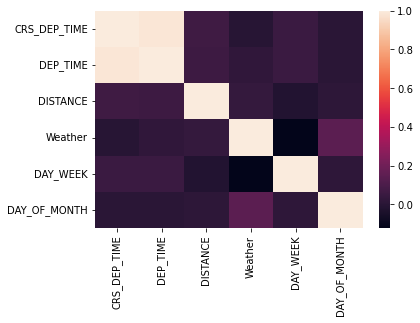

In [7]:
corr = norm_df.corr()
sns.heatmap(corr)

<AxesSubplot:>

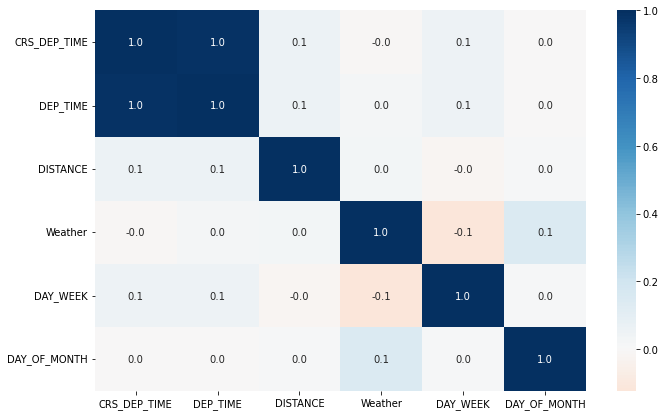

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

In [9]:
data_exploration = pd.read_csv('FlightDelaysExploration.csv')
data_exploration.describe()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1371.938664,1369.298955,211.871422,3815.086324,0.014539,3.905498,16.024989
std,432.697149,442.462754,13.316815,2409.750224,0.119725,1.903149,8.677390
min,600.000000,10.000000,169.000000,746.000000,0.000000,1.000000,1.000000
25%,1000.000000,1004.000000,213.000000,2156.000000,0.000000,2.000000,8.000000
50%,1455.000000,1450.000000,214.000000,2385.000000,0.000000,4.000000,16.000000
75%,1710.000000,1709.000000,214.000000,6155.000000,0.000000,5.000000,23.000000
max,2130.000000,2330.000000,229.000000,7924.000000,1.000000,7.000000,31.000000


In [10]:
day = []
for row in data_exploration['DAY_WEEK']:
        if row == 1 :    day.append('Monday')
        elif row == 2:   day.append('Tuesday')
        elif row == 3:   day.append('Wednesday')
        elif row == 4:   day.append('Thursday')
        elif row == 5:   day.append('Friday')
        elif row == 6:   day.append('Saturday')
        else :           day.append('Sunday')
data_exploration['day']=day
data_exploration
pv1=data_exploration.groupby(['day'])['Flight Status'].value_counts()
pv1

day        Flight Status
Friday     ontime           316
           delayed           75
Monday     ontime           224
           delayed           84
Saturday   ontime           226
           delayed           24
Sunday     ontime           185
           delayed           68
Thursday   ontime           315
           delayed           57
Tuesday    ontime           244
           delayed           63
Wednesday  ontime           263
           delayed           57
Name: Flight Status, dtype: int64

<BarContainer object of 3 artists>

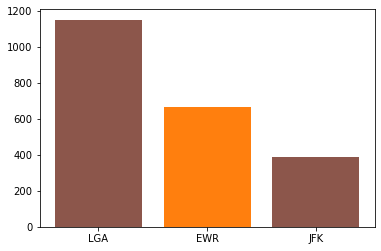

In [12]:
dest=data_exploration.DEST.value_counts()
fig,ax = plt.subplots()
ax.bar(dest.index, dest, color=['C5', 'C1'])

<BarContainer object of 3 artists>

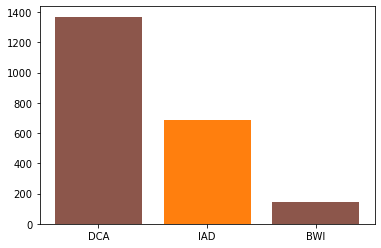

In [13]:
org = data_exploration.ORIGIN.value_counts()
fig,ax = plt.subplots()
ax.bar(org.index, org, color=['C5', 'C1'])

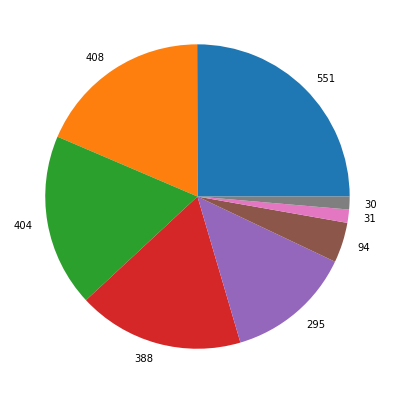

DH    551
RU    408
US    404
DL    388
MQ    295
CO     94
UA     31
OH     30
Name: CARRIER, dtype: int64

In [14]:
Car=data_exploration.CARRIER.value_counts()
fig = plt.figure(figsize =(10, 7))
plt.pie(Car, labels = Car)
plt.show()
Car

In [15]:
 pd.pivot_table(data_exploration, values=['CARRIER'], index=['Flight Status'],columns=['Flight Status'], aggfunc=np.mean, margins=True)

ValueError: Grouper for 'Flight Status' not 1-dimensional

In [16]:
train_df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,37987,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,2004-01-01,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,2004-01-01,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,2004-01-01,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,2004-01-01,7792,IAD,0,4,1,N698BR,ontime


In [17]:
tra_x, tes_y = train_test_split(train_df, test_size=0.4, random_state=1)

predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER','FL_NUM']
outcome = ['Flight Status']


train_x = pd.get_dummies(tra_x[predictors])
train_y = tra_x['Flight Status']
test_x  = pd.get_dummies(tes_y[predictors])
test_y  = tes_y['Flight Status']


In [18]:
print(train_x)

      DAY_WEEK  CRS_DEP_TIME  FL_NUM  ORIGIN_BWI  ORIGIN_DCA  ORIGIN_IAD  \
1215         7          2120    7684           0           0           1   
1476         3           700    2160           0           1           0   
1897         2           900    2164           0           1           0   
83           5          1300    2172           0           1           0   
1172         6          1455     746           0           1           0   
...        ...           ...     ...         ...         ...         ...   
960          3          1830    4784           0           1           0   
905          2           700    2703           1           0           0   
1096         5           730    1742           0           1           0   
235          1          1645    7810           0           0           1   
1061         4          1455    2403           1           0           0   

      DEST_EWR  DEST_JFK  DEST_LGA  CARRIER_CO  CARRIER_DH  CARRIER_DL  \
1215         

In [19]:
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(train_x, train_y)

MultinomialNB(alpha=0.01)

In [20]:
predProb_train = delays_nb.predict_proba(train_x)

predProb_valid = delays_nb.predict_proba(test_x)
predProb_valid

array([[1.00000000e+00, 5.90538984e-29],
       [1.34982235e-02, 9.86501776e-01],
       [1.00000000e+00, 1.05761104e-27],
       ...,
       [1.25729870e-26, 1.00000000e+00],
       [4.38010664e-01, 5.61989336e-01],
       [1.29802372e-28, 1.00000000e+00]])

In [21]:
y_valid_pred = delays_nb.predict(test_x)
y_train_pred = delays_nb.predict(train_x)

In [23]:
tes = pd.read_csv('test5.csv')

tes_X = pd.get_dummies(tes[predictors])
tes_y= tes['Flight Status']

print(tes_X)

   DAY_WEEK  CRS_DEP_TIME  FL_NUM  ORIGIN_DCA  ORIGIN_IAD  DEST_JFK  DEST_LGA  \
0         1            16    7810           0           1         1         0   
1         3             6    1740           1           0         0         1   
2         2             6    4760           1           0         1         0   
3         3            18    1764           1           0         0         1   

   CARRIER_DH  CARRIER_DL  CARRIER_MQ  
0           1           0           0  
1           0           1           0  
2           0           0           1  
3           0           1           0  


In [24]:
coloumn_names =['DAY_WEEK','CRS_DEP_TIME','ORIGIN_BWI','ORIGIN_DCA','ORIGIN_IAD','DEST_EWR','DEST_JFK','DEST_LGA','CARRIER_CO','CARRIER_DH','CARRIER_DL','CARRIER_MQ','CARRIER_OH','CARRIER_RU','CARRIER_UA','CARRIER_US','FL_NUM']
tes_X = tes_X.reindex(columns = coloumn_names)  
a=tes_X.fillna(0)

print(a)

   DAY_WEEK  CRS_DEP_TIME  ORIGIN_BWI  ORIGIN_DCA  ORIGIN_IAD  DEST_EWR  \
0         1            16         0.0           0           1       0.0   
1         3             6         0.0           1           0       0.0   
2         2             6         0.0           1           0       0.0   
3         3            18         0.0           1           0       0.0   

   DEST_JFK  DEST_LGA  CARRIER_CO  CARRIER_DH  CARRIER_DL  CARRIER_MQ  \
0         1         0         0.0           1           0           0   
1         0         1         0.0           0           1           0   
2         1         0         0.0           0           0           1   
3         0         1         0.0           0           1           0   

   CARRIER_OH  CARRIER_RU  CARRIER_UA  CARRIER_US  FL_NUM  
0         0.0         0.0         0.0         0.0    7810  
1         0.0         0.0         0.0         0.0    1740  
2         0.0         0.0         0.0         0.0    4760  
3         0.0     

In [25]:
test_pred = delays_nb.predict(a)
test_pred

array(['ontime', 'ontime', 'ontime', 'ontime'], dtype='<U7')

In [26]:
print("Accuracy:",metrics.accuracy_score(test_y, y_valid_pred))

Accuracy: 0.5641316685584563


In [27]:
clf = DecisionTreeClassifier()

In [28]:
clf = clf.fit(train_x,train_y)

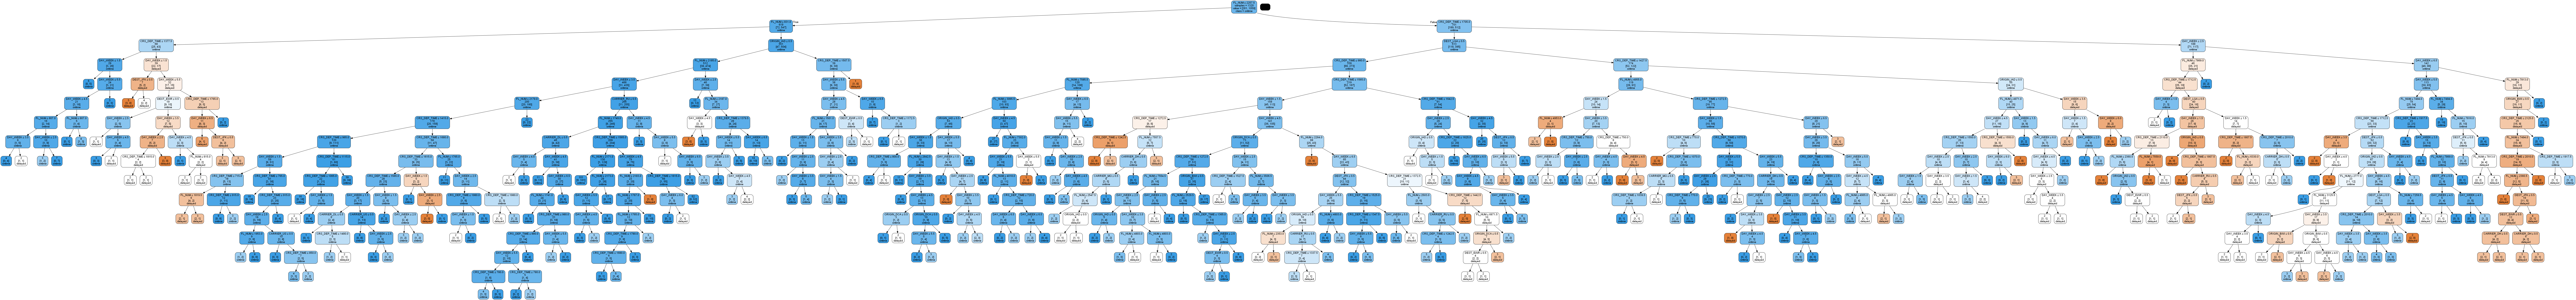

In [29]:
plotDecisionTree(clf, feature_names=train_x.columns, class_names=clf.classes_)

In [30]:
y_pred = clf.predict(test_x)

In [31]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.6855845629965948


In [32]:
a

,DAY_WEEK,CRS_DEP_TIME,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,DEST_EWR,DEST_JFK,DEST_LGA,CARRIER_CO,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,FL_NUM
0,1,16,0.0,0,1,0.0,1,0,0.0,1,0,0,0.0,0.0,0.0,0.0,7810
1,3,6,0.0,1,0,0.0,0,1,0.0,0,1,0,0.0,0.0,0.0,0.0,1740
2,2,6,0.0,1,0,0.0,1,0,0.0,0,0,1,0.0,0.0,0.0,0.0,4760
3,3,18,0.0,1,0,0.0,0,1,0.0,0,1,0,0.0,0.0,0.0,0.0,1764


In [33]:
y_pred2 = clf.predict(a)

In [34]:
y_pred2

array(['ontime', 'ontime', 'ontime', 'ontime'], dtype=object)

In [35]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_x, train_y)

LogisticRegression(C=1e+42, solver='liblinear')

In [36]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.6855845629965948
